In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/Exposys data labs/50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [4]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [5]:
df.shape

(50, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [7]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = [c.replace('&', '_and_') for c in df.columns]

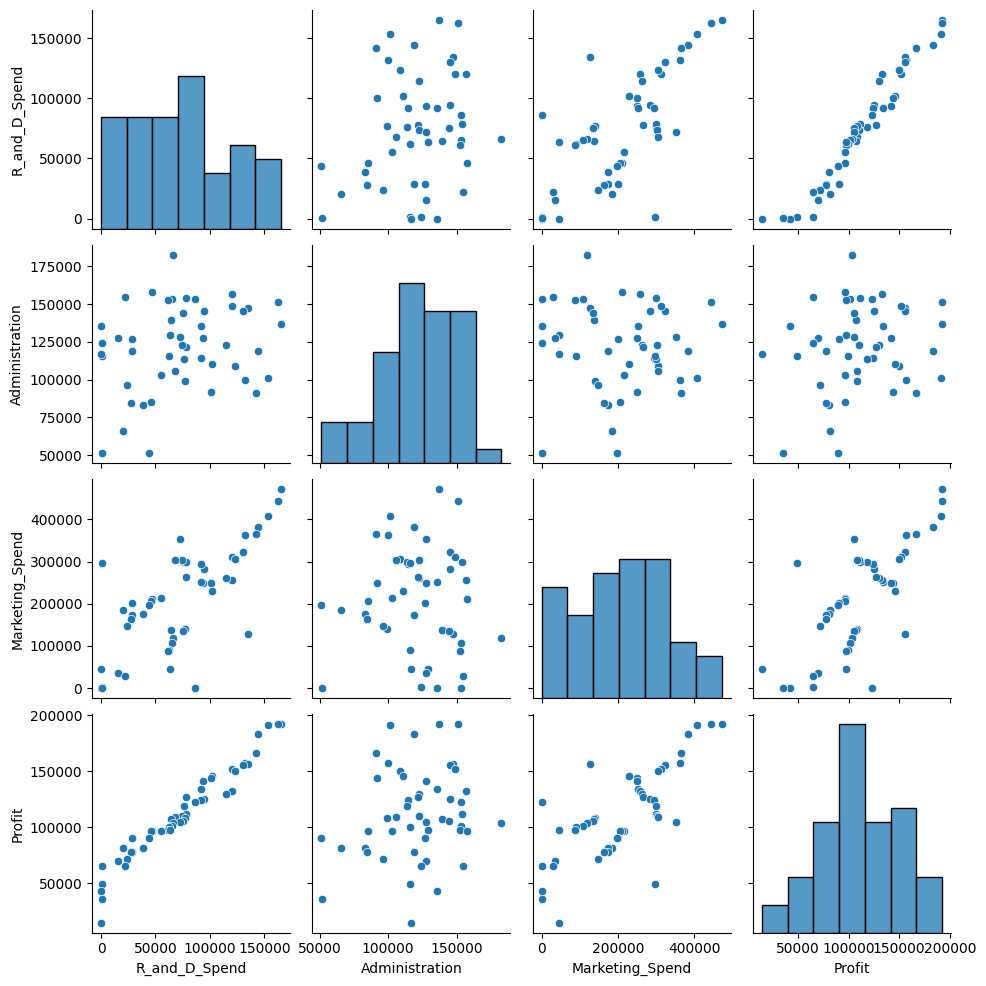

In [8]:
sns.pairplot(df)

In [9]:
cdf = df[['R_and_D_Spend','Administration','Marketing_Spend','Profit']]
cdf.head(9)

,R_and_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77


In [10]:
x = df[['R_and_D_Spend','Administration','Marketing_Spend']]
y = df[['Profit']]

Let's split the dataset into train and test

In [11]:
msk = np.random.rand(len(df)) < 0.7
train = cdf[msk]
test = cdf[~msk]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Multiple Linear regression model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error

In [13]:
regr = linear_model.LinearRegression()

In [14]:
x = np.asanyarray(train[['R_and_D_Spend','Administration','Marketing_Spend']])
y = np.asanyarray(train[['Profit']])

In [15]:
print(x.shape)
print(y.shape)

(38, 3)
(38, 1)


In [16]:
regr.fit(x,y)

#the coefficients
print('Coefficients: ', regr.coef_)
#the intercept
print('Intercepts: ', regr.intercept_)

Coefficients:  [[ 0.81346251 -0.0116645   0.02476064]]
Intercepts:  [48069.56032944]


In [17]:
y_hat = regr.predict(test[['R_and_D_Spend','Administration','Marketing_Spend']])
x = np.asanyarray(test[['R_and_D_Spend','Administration','Marketing_Spend']])
y = np.asanyarray(test[['Profit']])

print('Residual sum of squares: %.2f' % np.mean((y_hat - y)**2))
print('Variance score: %.2f' % regr.score(x,y))

Residual sum of squares: 70355166.67
Variance score: 0.94


C:\Program Files\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [18]:
print('Mean absolute error: %.2f' % mean_absolute_error(y,y_hat))
print('Mean absolute percentage error: %.2f' % mean_absolute_percentage_error(y,y_hat))
print('R2 score: %.2f' % r2_score(y,y_hat))

Mean absolute error: 6793.01
Mean absolute percentage error: 0.07
R2 score: 0.94


# Regression Tree

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop(columns=['Profit'])
Y = df[['Profit']]

In [21]:
X.head()

,R_and_D_Spend,Administration,Marketing_Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [22]:
Y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [24]:
regression_tree = DecisionTreeRegressor(criterion = "squared_error")

In [25]:
regression_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [26]:
regression_tree.predict(X_test)

array([108733.99,  96712.8 ,  77798.83,  71498.49, 192261.83, 166187.94,
        64926.08, 103282.38,  71498.49,  99937.59, 107404.34,  89949.14,
       124266.9 ,  77798.83, 141585.52])

In [27]:
regression_tree.score(X_test, Y_test)

0.8903539805949241